In [256]:
from __future__ import division
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

import pycwt as wavelet
from pycwt.helpers import find

In [257]:
dados = pd.read_excel('Fermi_Atualizado.xlsx')

# Excluir valores negativos de latitude
lat = dados['geo_lat']
for x in range(len(dados)):
    if lat[x] < 0:
        lat[x] = np.nan
dados = dados.dropna()
cont = dados['trigger_time'].groupby([dados["trigger_time"].dt.year, dados["trigger_time"].dt.month]).count()

C:\Users\PC\AppData\Local\Temp\ipykernel_19048\270442332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat[x] = np.nan


In [258]:
# print(cont.index) # Utilizo para verificar o mês
indice = []
dt = 1 / 12
for a in range (len(cont.index)):
    i = round((cont.index[a][0] + (cont.index[a][1]*dt) )*10000)/10000
    indice.append(i)
print(indice)
print("________________________________________________________")
# Referência dos meses:
for i in range(1,13):
    print((round(i*dt*10000)/10000), "mês: %d" %i)

[2011.8333, 2011.9167, 2012.0, 2012.0833, 2012.3333, 2012.4167, 2012.5, 2012.5833, 2012.6667, 2012.75, 2012.8333, 2012.9167, 2013.0833, 2013.25, 2013.3333, 2013.4167, 2013.5, 2013.5833, 2013.6667, 2013.75, 2013.8333, 2013.9167, 2014.0, 2014.0833, 2014.25, 2014.3333, 2014.4167, 2014.5, 2014.5833, 2014.6667, 2014.75, 2014.8333, 2014.9167, 2015.0, 2015.0833, 2015.1667, 2015.25, 2015.3333, 2015.4167, 2015.5, 2015.5833, 2015.6667, 2015.75, 2015.8333, 2015.9167, 2016.0, 2016.0833, 2016.25, 2016.3333, 2016.4167, 2016.5, 2016.5833, 2016.6667, 2016.75, 2016.8333, 2016.9167, 2017.0, 2017.0833, 2017.1667, 2017.25, 2017.3333, 2017.4167, 2017.5, 2017.5833, 2017.6667, 2017.75, 2017.8333, 2017.9167, 2018.3333, 2018.4167, 2018.5, 2018.5833, 2018.6667, 2018.75, 2018.8333, 2018.9167, 2019.0, 2019.0833, 2019.25, 2019.3333, 2019.4167, 2019.5, 2019.5833, 2019.6667, 2019.75, 2019.8333, 2019.9167, 2020.0, 2020.1667, 2020.25, 2020.3333, 2020.4167, 2020.5, 2020.5833, 2020.6667, 2020.75, 2020.8333, 2020.9167, 2

## Visualizar antes de dessazonalizar (Série temporal).

<AxesSubplot:title={'center':'Série de eventos'}, xlabel='Data (Ano, mês)', ylabel='Contagem de eventos'>

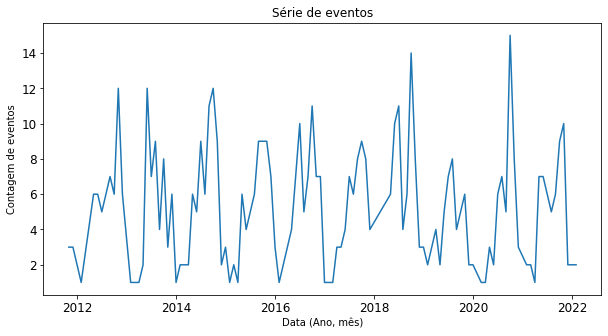

In [259]:
valores = cont.tolist()
# print(valores) # Lista de contagens

tabelinha = pd.DataFrame(valores, index=indice)
tabelinha.plot(fontsize=12, figsize=(10, 5), title='Série de eventos', xlabel='Data (Ano, mês)', ylabel='Contagem de eventos', legend=None)

## Média de contagem dos meses

In [260]:
janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro = 0,0,0,0,0,0,0,0,0,0,0,0
a,b,c,d,e,f,g,h,i,j,k,l = 0,0,0,0,0,0,0,0,0,0,0,0
cont_avg = []

In [261]:
print(valores)
print("________________________________")
print(indice)

[3, 3, 2, 1, 6, 6, 5, 6, 7, 6, 12, 6, 1, 1, 2, 12, 7, 9, 4, 8, 3, 6, 1, 2, 2, 6, 5, 9, 6, 11, 12, 9, 2, 3, 1, 2, 1, 6, 4, 5, 6, 9, 9, 9, 7, 3, 1, 3, 4, 7, 10, 5, 7, 11, 7, 7, 1, 1, 1, 3, 3, 4, 7, 6, 8, 9, 8, 4, 6, 10, 11, 4, 6, 14, 8, 3, 3, 2, 4, 2, 5, 7, 8, 4, 5, 6, 2, 2, 1, 1, 3, 2, 6, 7, 5, 15, 8, 3, 2, 2, 1, 7, 7, 6, 5, 6, 9, 10, 2, 2, 2]
________________________________
[2011.8333, 2011.9167, 2012.0, 2012.0833, 2012.3333, 2012.4167, 2012.5, 2012.5833, 2012.6667, 2012.75, 2012.8333, 2012.9167, 2013.0833, 2013.25, 2013.3333, 2013.4167, 2013.5, 2013.5833, 2013.6667, 2013.75, 2013.8333, 2013.9167, 2014.0, 2014.0833, 2014.25, 2014.3333, 2014.4167, 2014.5, 2014.5833, 2014.6667, 2014.75, 2014.8333, 2014.9167, 2015.0, 2015.0833, 2015.1667, 2015.25, 2015.3333, 2015.4167, 2015.5, 2015.5833, 2015.6667, 2015.75, 2015.8333, 2015.9167, 2016.0, 2016.0833, 2016.25, 2016.3333, 2016.4167, 2016.5, 2016.5833, 2016.6667, 2016.75, 2016.8333, 2016.9167, 2017.0, 2017.0833, 2017.1667, 2017.25, 2017.3333, 

In [262]:
for x in range(len(indice)):
    if str(indice[x])[5:] == "0833":
        janeiro += valores[x]
        a += 1
    elif str(indice[x])[5:] == "1667":
        fevereiro += valores[x]
        b += 1
    elif str(indice[x])[5:] == "25":
        marco += valores[x]
        c += 1
    elif str(indice[x])[5:] == "3333":
        abril += valores[x]
        d += 1
    elif str(indice[x])[5:] == "4167":
        maio += valores[x]
        e += 1
    elif str(indice[x])[5:] == "5":
        junho += valores[x]
        f += 1
    elif str(indice[x])[5:] == "5833":
        julho += valores[x]
        g += 1
    elif str(indice[x])[5:] == "6667":
        agosto += valores[x]
        h += 1
    elif str(indice[x])[5:] == "75":
        setembro += valores[x]
        i += 1
    elif str(indice[x])[5:] == "8333":
        outubro += valores[x]
        j += 1
    elif str(indice[x])[5:] == "9167":
        novembro += valores[x]
        k += 1
    else:
        dezembro += valores[x]
        l += 1

In [263]:
jan_avg = janeiro/a
fev_avg = fevereiro/b
mar_avg = marco/c
abr_avg = abril/d
mai_avg = maio/e
jun_avg = junho/f
jul_avg = julho/g
ago_avg = agosto/h
set_avg = setembro/i
out_avg = outubro/j
nov_avg = novembro/k
dez_avg = dezembro/l

In [264]:
for x in range(len(indice)):
    mes_withAvg = 0.0
    if str(indice[x])[5:] == "0833":
        mes_withAvg = valores[x] - jan_avg
    elif str(indice[x])[5:] == "1667":
        mes_withAvg = valores[x] - fev_avg
    elif str(indice[x])[5:] == "25":
        mes_withAvg = valores[x] - mar_avg
    elif str(indice[x])[5:] == "3333":
        mes_withAvg = valores[x] - abr_avg
    elif str(indice[x])[5:] == "4167":
        mes_withAvg = valores[x] - mai_avg
    elif str(indice[x])[5:] == "5":
        mes_withAvg = valores[x] - jun_avg
    elif str(indice[x])[5:] == "5833":
        mes_withAvg = valores[x] - jul_avg
    elif str(indice[x])[5:] == "6667":
        mes_withAvg = valores[x] - ago_avg
    elif str(indice[x])[5:] == "75":
        mes_withAvg = valores[x] - set_avg
    elif str(indice[x])[5:] == "8333":
        mes_withAvg = valores[x] - out_avg
    elif str(indice[x])[5:] == "9167":
        mes_withAvg = valores[x] - nov_avg
    else:
        mes_withAvg = valores[x] - dez_avg
    cont_avg.append(mes_withAvg)

anomalia = pd.Series(data=cont_avg, index=indice)

## Anomalia (Série dessazonalizada).

2011.8333   -4.545455
2011.9167   -1.090909
2012.0000   -0.125000
2012.0833   -0.444444
2012.3333    1.500000
               ...   
2021.7500   -0.800000
2021.8333    2.454545
2021.9167   -2.090909
2022.0000   -0.125000
2022.0833    0.555556
Length: 111, dtype: float64


<AxesSubplot:title={'center':'Série de anomalias'}, xlabel='Data (Ano, mês)', ylabel='Contagem de eventos'>

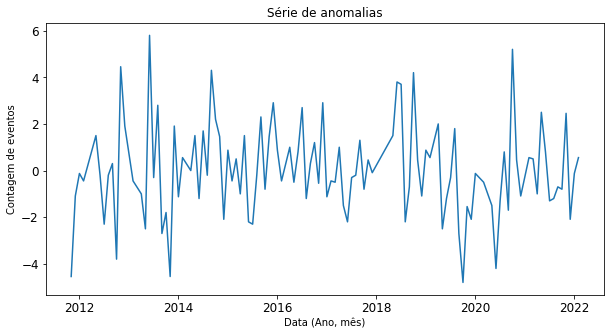

In [265]:
# print(indice) # verifica o mês
print(anomalia) # verifica serie temporal tirado a média de cada mês
# anomalia.to_excel('Dessazonalizado.xlsx')

anomalia.plot(fontsize=12, figsize=(10, 5), title='Série de anomalias', xlabel='Data (Ano, mês)', ylabel='Contagem de eventos')

## Wavelet

In [266]:
# Arrumando tabela de valores
dados = []
b = list(anomalia.values)
for x in b:
    dados.append(x)
dados = pd.DataFrame(dados, columns=['dados dessazonalizados'])
dat = dados['dados dessazonalizados']

title = 'Numero de TGFs por mês'
label = 'Numero de TGFs'
units = 'Unit'

t0 = 2011.8333  # First year of record
dt = 1 / 12 # Em meses
N = dat.size
t = np.arange(0,N) * dt + t0

## Normalizando a anomalia (série já dessazonalizada).

## Continuando wavelet

In [267]:
# Média
dat_mean = np.mean(anomalia)
dat_noMean = []
for x in anomalia:
    a = x - dat_mean
    dat_noMean.append(a)
dat_noMean = pd.Series(data=dat_noMean, index=indice)
print(dat_noMean)
    

2011.8333   -4.545455
2011.9167   -1.090909
2012.0000   -0.125000
2012.0833   -0.444444
2012.3333    1.500000
               ...   
2021.7500   -0.800000
2021.8333    2.454545
2021.9167   -2.090909
2022.0000   -0.125000
2022.0833    0.555556
Length: 111, dtype: float64


In [268]:
std = dat_noMean.std()

dat_norm = dat_noMean / std


In [269]:
mother = wavelet.Morlet(6)
s0 = 1 * dt 
dj = 1 / 12
J = 7 / dj
alpha, _, _ = wavelet.ar1(dat)

dat_normDF = pd.DataFrame(dat_norm, index=indice, columns=['Dados normalizados'])
dat_norm = dat_normDF['Dados normalizados']
# dat_normDF.plot(fontsize=12, figsize=(10, 5), title='Série de anomalias normalizadas', xlabel='Data (Ano, mês)', ylabel='Contagem de eventos')

In [270]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J, mother)

KeyError: 'ALIGNED'